In [ ]:
from tensorflow import keras
from tensorflow.keras.datasets import fashion_mnist
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
from random import seed, randint

In [ ]:
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

4422102/4422102 [==============================] - 0s 0us/step
(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, shuffle=True, stratify=y_train)
print(X_train.shape, y_train.shape, X_val.shape, y_val.shape)

(48000, 28, 28) (48000,) (12000, 28, 28) (12000,)


In [ ]:
# keep an non pre-processed copy of X_test/y_test for visualization
test_images, test_labels = X_test.copy(), y_test.copy()

In [ ]:
X_train = X_train.astype('float32')/255
X_val = X_val.astype('float32')/255
X_test = X_test.astype('float32')/255

X_train = np.reshape(X_train, X_train.shape + (1,))
X_val = np.reshape(X_val, X_val.shape+ (1,))
X_test = np.reshape(X_test, X_test.shape+ (1,))

num_classes=10
y_train = keras.utils.to_categorical(y_train, num_classes)
y_val = keras.utils.to_categorical(y_val, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

print(X_train.shape, y_train.shape, X_val.shape, y_val.shape, X_test.shape, y_test.shape)

(48000, 28, 28, 1) (48000, 10) (12000, 28, 28, 1) (12000, 10) (10000, 28, 28, 1) (10000, 10)


In [ ]:
FASHION_LABELS = {
        0: 'T-shirt/top',
        1: 'Trouser',
        2: 'Pullover',
        3: 'Dress',
        4: 'Coat',
        5: 'Sandal',
        6: 'Shirt',
        7: 'Sneaker',
        8: 'Bag',
        9: 'Ankle boot',
}

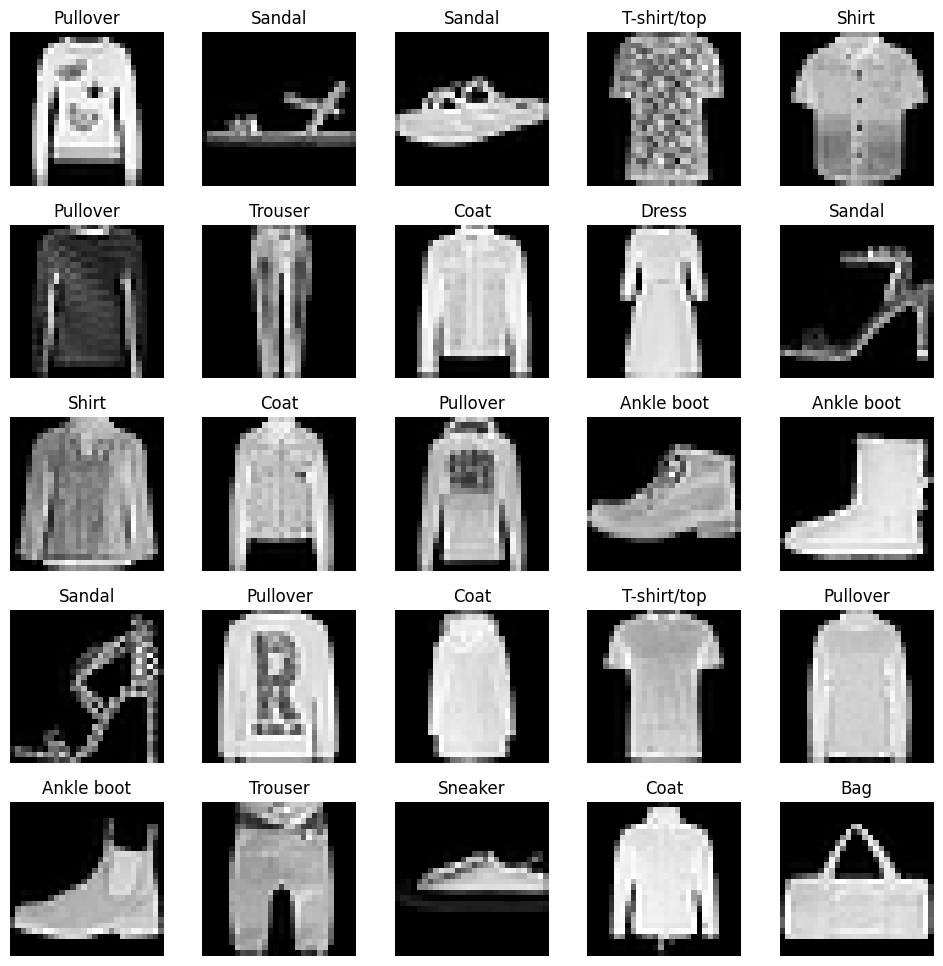

In [ ]:
plt.figure(1, figsize=(12,12))
plt.subplots_adjust(hspace=0.25) #, wspace=3)
for i in range(25):
    plt.subplot(5, 5, i+1)
    j = randint(0, test_labels.shape[0]-1)
    plt.imshow(test_images[j], cmap='gray', interpolation='none')
    plt.title('{}'.format(FASHION_LABELS[test_labels[j]]))
    plt.axis("off")
plt.show()

In [ ]:
from tensorflow.keras.layers import Input, Conv2D, Activation, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization, GaussianNoise
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import regularizers

In [ ]:
model = Sequential()

model.add(Conv2D(64, kernel_size=(3, 3), padding='same', activation='relu', input_shape=(28,28,1)))
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))

model.add(Conv2D(128, kernel_size=(3, 3), padding='same', activation='relu'))
model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))

model.add(Conv2D(256, kernel_size=(3, 3), padding='same', activation='relu'))
model.add(Conv2D(256, kernel_size=(3, 3), activation='relu'))

model.add(Flatten())
model.add(Dense(1024, activation='relu'))
model.add(Dense(512, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 64)        640       
                                                                 
 conv2d_1 (Conv2D)           (None, 26, 26, 64)        36928     
                                                                 
 conv2d_2 (Conv2D)           (None, 26, 26, 128)       73856     
                                                                 
 conv2d_3 (Conv2D)           (None, 24, 24, 128)       147584    
                                                                 
 conv2d_4 (Conv2D)           (None, 24, 24, 256)       295168    
                                                                 
 conv2d_5 (Conv2D)           (None, 22, 22, 256)       590080    
                                                                 
 flatten (Flatten)           (None, 123904)            0

In [ ]:
opt = Adam()
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])  # sparse_

In [ ]:
epochs = 40
batch_size = 50
history = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_data=(X_val, y_val))

Epoch 1/40
960/960 [==============================] - 80s 69ms/step - loss: 0.4447 - accuracy: 0.8374 - val_loss: 0.3375 - val_accuracy: 0.8773
Epoch 2/40
960/960 [==============================] - 67s 70ms/step - loss: 0.2740 - accuracy: 0.8980 - val_loss: 0.2600 - val_accuracy: 0.9043
Epoch 3/40
960/960 [==============================] - 69s 72ms/step - loss: 0.2062 - accuracy: 0.9230 - val_loss: 0.2378 - val_accuracy: 0.9144
Epoch 4/40
960/960 [==============================] - 69s 72ms/step - loss: 0.1547 - accuracy: 0.9425 - val_loss: 0.2648 - val_accuracy: 0.9131
Epoch 5/40
960/960 [==============================] - 70s 72ms/step - loss: 0.1063 - accuracy: 0.9602 - val_loss: 0.2894 - val_accuracy: 0.9143
Epoch 6/40
960/960 [==============================] - 68s 71ms/step - loss: 0.0718 - accuracy: 0.9743 - val_loss: 0.3132 - val_accuracy: 0.9155
Epoch 7/40
960/960 [==============================] - 70s 73ms/step - loss: 0.0495 - accuracy: 0.9828 - val_loss: 0.3962 - val_accuracy:

In [ ]:
train_results = model.evaluate(X_train, y_train, verbose=0)
print('Error (loss) sobre datos de entrenamiento: {:.4f}'.format(train_results[0]))
print('Tasa de éxito de clasificación (accuracy) sobre datos de entrenamiento: {:.4f}\n'.format(train_results[1]))

val_results = model.evaluate(X_val, y_val, verbose=0)
print('Error (loss) sobre datos de validación: {0:.4f}'.format(val_results[0]))
print('Tasa de éxito de clasificación (accuracy) sobre datos de validación: {0:.4f}\n'.format(val_results[1]))

test_results = model.evaluate(X_test, y_test, verbose=0)
print('Error (loss) sobre datos de test: {0:.4f}'.format(test_results[0]))
print('Tasa de éxito de clasificación (accuracy) sobre datos de test: {0:.4f}\n'.format(test_results[1]))

Error (loss) sobre datos de entrenamiento: 0.0034
Tasa de éxito de clasificación (accuracy) sobre datos de entrenamiento: 0.9990

Error (loss) sobre datos de validación: 0.9488
Tasa de éxito de clasificación (accuracy) sobre datos de validación: 0.9107

Error (loss) sobre datos de test: 0.9899
Tasa de éxito de clasificación (accuracy) sobre datos de test: 0.9059



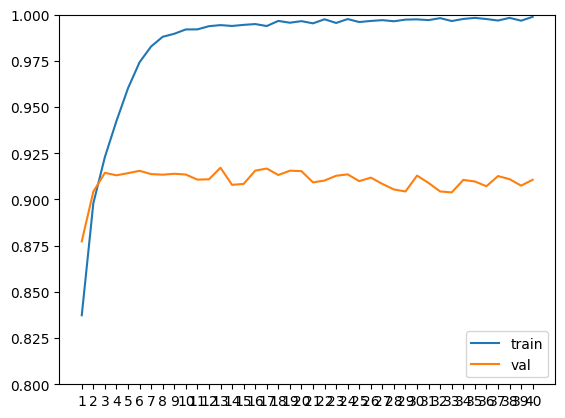

In [ ]:
plt.figure(2)
x = range(1,epochs+1)
plt.plot(x, history.history['accuracy'], label='train')
plt.plot(x, history.history['val_accuracy'], label='val')
plt.xticks(x)
plt.ylim(0.8, 1)
plt.legend(loc="lower right")
plt.show()